# XGBoost

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score, cross_val_predict

sklearn.set_config(print_changed_only=False)

import xgboost as xgb

from matplotlib import pyplot as plt

import import_ipynb
from Self_Written_Functions_Sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype
from Self_Written_Functions_Sheet import rmse, conversion

%store -r

importing Jupyter notebook from Self_Written_Functions_Sheet.ipynb


In [2]:
hp_xgb = hp_xgb.drop(['Id'], axis=1)
hp_xgb

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.5,1.0,706,1,1,0,61,1,0,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.0,0.5,978,1,0,0,0,0,1,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.5,1.0,486,1,1,0,42,1,0,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1.0,1.0,216,1,1,0,307,1,0,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.5,1.0,655,1,1,0,84,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.5,0.0,0,1,1,0,40,1,0,7
1454,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,2.0,1.0,953,1,0,0,0,0,1,22
1455,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,

In [4]:
# columns that have dtype=='object' vs not
cols_obj = []
cols_num = []

# Creates list of column names with dtype=='object' and one where dtype!='object'
col_obj_list(hp_xgb, hp_xgb.columns, cols_obj, cols_num)

# columns that have dtype=='object'
cols_obj

from sklearn.preprocessing import OrdinalEncoder

# ordinalencoder does not take NaN values
hp_xgb_shortened = hp_xgb[cols_obj]
hp_xgb_fillna = hp_xgb_shortened.fillna('0')
hp_xgb_str = hp_xgb_fillna.astype('str')

# using these parameters in case there are values that have not been seen before
le_df = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
hp_xgb_enc = le_df.fit_transform(hp_xgb_str)
hp_xgb_enc = pd.DataFrame(hp_xgb_enc, columns=cols_obj)

hp_xgb_final = pd.concat([hp_xgb[cols_num], hp_xgb_enc], axis=1)

hp_xgb_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBaths,BsmtBaths,BsmtFinTotalSF,BsmtUnfin,2ndFlr,LowQualFin,TotalPorchSF,Porches,Decks,YrsRemodToSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,2.5,1.0,706,1,1,0,61,1,0,5,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,0.0,2.0,2.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,4.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,2.0,0.5,978,1,0,0,0,0,1,31,3.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,3.0,3.0,4.0,1.0,3.0,4.0,2.0,1.0,6.0,1.0,0.0,1.0,5.0,3.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,4.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,2.5,1.0,486,1,1,0,42,1,0,6,3.0,1.0,0.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,3.0,4.0,3.0,3.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,4.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,1.0,1.0,216,1,1,0,307,1,0,36,3.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,15.0,3.0,3.0,4.0,0.0,4.0,2.0,4.0,1.0,6.0,1.0,2.0,1.0,5.0,2.0,6.0,3.0,6.0,3.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,2.5,1.0,655,1,1,0,84,1,1,8,3.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,3.0,4.0,1.0,3.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,2.5,0.0,0,1,1,0,40,1,0,7,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,6.0,6.0,1.0,0.0,1.0,5.0,3.0,6.0,5.0,2.0,2.0,5.0,5.0,2.0,0.0,0.0,0.0,8.0,4.0
1454,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,2.0,1.0,953,1,0,0,0,0,1,22,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,10.0,4.0,3.0,4.0,1.0,3.0,4.0,4.0,1.0,5.0,1.0,4.0,1.0,5.0,3.0,2.0,5.0,2.0,3.0,5.0,5.0,2.0,0.0,3.0,0.0,8.0,4.0
1455,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,2.0,0.0,275,1,1,0,60,1,0,4,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,5.0,5.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,3.0,6.0,1.0,0.0,1.0,5.0,2.0,6.0,3.0,2.0,2.0,5.0,5.0,2.0,0.0,1.0,3.0,8.0,4.0
1456,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,1.0,1.0,1078,0,0,0,112,1,1

## Preparing train and test data as well as the parameters that will not change

In [5]:
# train test split using the dataframe from above
state = 0

xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_xgb_final,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

ytrain = ytrain.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

# using GPU
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse')

In [6]:
# using lists to store values for dataframe
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [45, 89, 180, 300, 500]
maxdepth = [2, 3, 4, 5]
eta_ = np.linspace(0.08, 0.3, 6)

gparam_xgb = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

# applying gridsearch using the n_folds value from above
gs_xgb = ms.GridSearchCV(xg_reg, gparam_xgb, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb.fit(xtrain, ytrain)

# appending values to lists to create dataframe
l_scores.append(gs_xgb.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb, ytest, xtest))
best_par_list.append(gs_xgb.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]

# creating dataframe
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 9min 1s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.971136,0.067338,0.108531,-0.041192,0.168,2,300


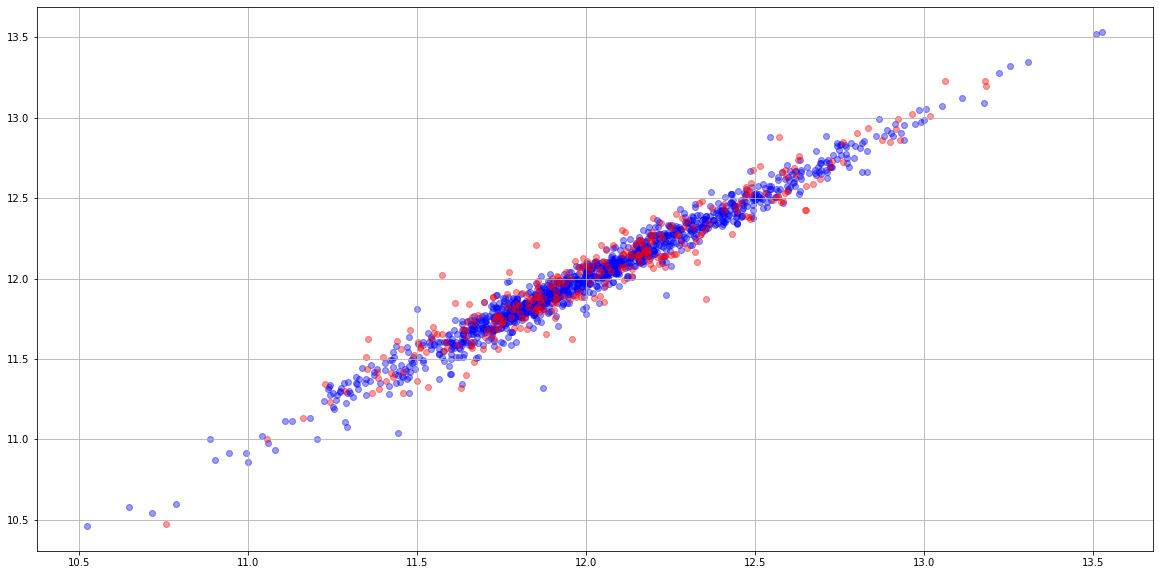

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

### The above fit seems to be the best for hp_xgb_final dataset

In [65]:
xg_reg_hp_xgb_final = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                                       predictor='gpu_predictor', random_state=state,
                                       eval_metric='rmse', n_estimators=300, max_depth=2,
                                       learning_rate=0.168)

%store xg_reg_hp_xgb_final

Stored 'xg_reg_hp_xgb_final' (XGBRegressor)


In [8]:
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
#                           predictor='gpu_predictor', random_state=state, eval_metric='rmse')

nestimators = [200, 250, 300, 350, 400]
maxdepth = [2, 3, 4]
eta_ = np.linspace(0.14, 0.18, 6)

gparam_xgb_1 = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

gs_xgb_1 = ms.GridSearchCV(xg_reg, gparam_xgb_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_1.fit(xtrain, ytrain)

l_scores.append(gs_xgb_1.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb_1, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_1, ytest, xtest))
best_par_list.append(gs_xgb_1.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 7min 41s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.973685,0.064296,0.106632,-0.042336,0.14,2,400


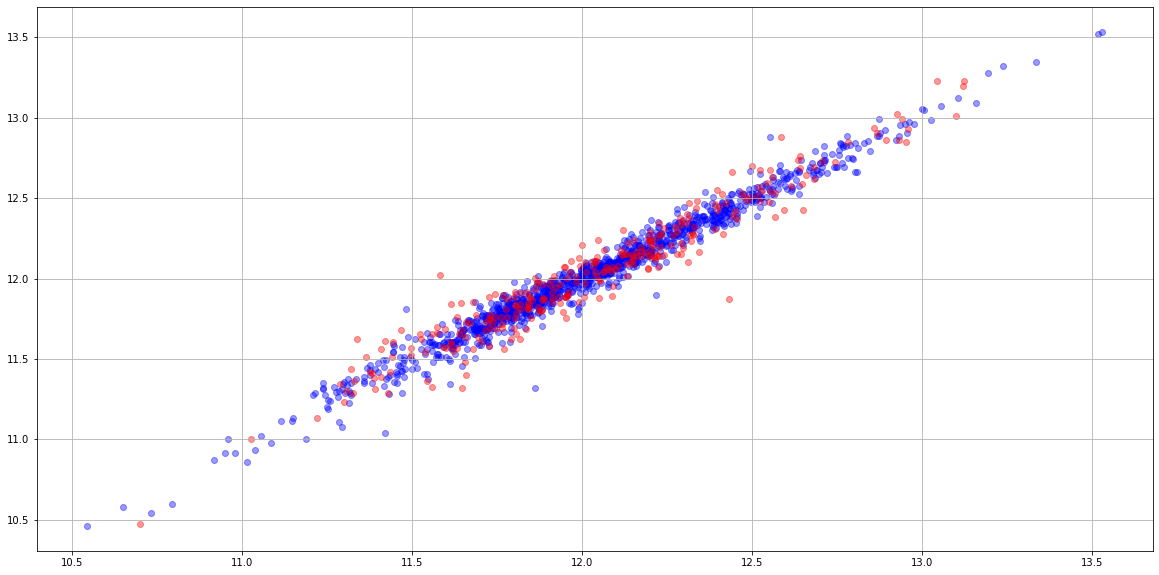

In [9]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [10]:
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
#                           predictor='gpu_predictor', random_state=state, eval_metric='rmse')

nestimators = [375, 390, 400, 425, 450, 500]
maxdepth = [2, 3]
eta_ = np.linspace(0.125, 0.16, 8)

gparam_xgb_2 = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

gs_xgb_2 = ms.GridSearchCV(xg_reg, gparam_xgb_2, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_2.fit(xtrain, ytrain)

l_scores.append(gs_xgb_2.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb_2, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_2, ytest, xtest))
best_par_list.append(gs_xgb_2.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 10min 11s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.975918,0.061508,0.107117,-0.045609,0.14,2,450


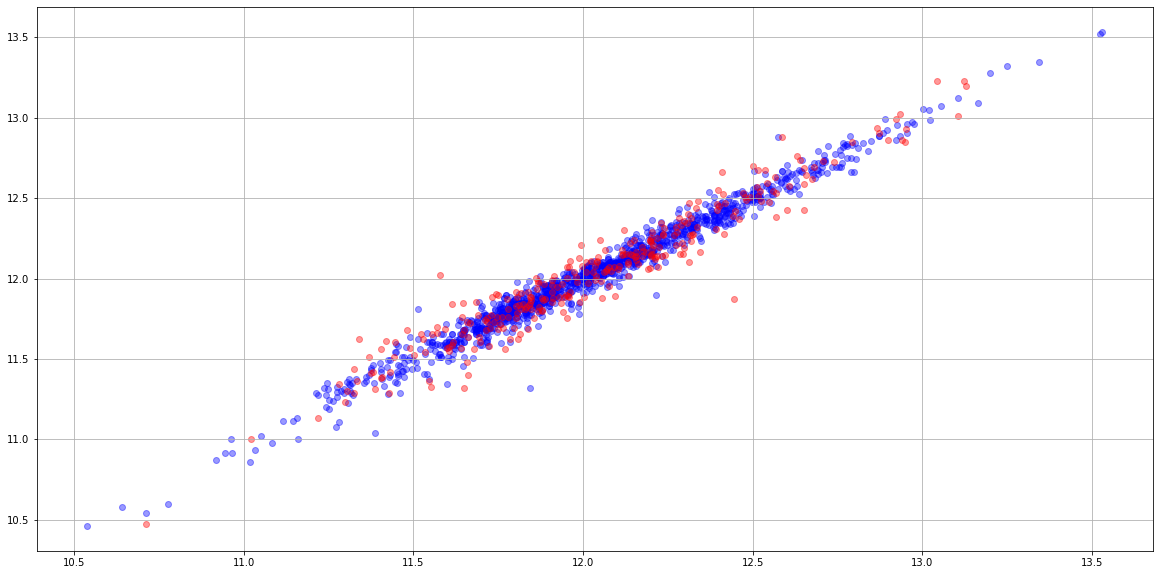

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_2.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_2.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [13]:
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
#                           predictor='gpu_predictor', random_state=state, eval_metric='rmse')

nestimators = [430, 440, 450, 460, 470]
maxdepth = [2]
eta_ = np.linspace(0.135, 0.145, 11)

gparam_xgb_3 = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

gs_xgb_3 = ms.GridSearchCV(xg_reg, gparam_xgb_3, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_3.fit(xtrain, ytrain)

l_scores.append(gs_xgb_3.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb_3, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_3, ytest, xtest))
best_par_list.append(gs_xgb_3.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 5min 37s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.976862,0.06029,0.106905,-0.046615,0.14,2,470


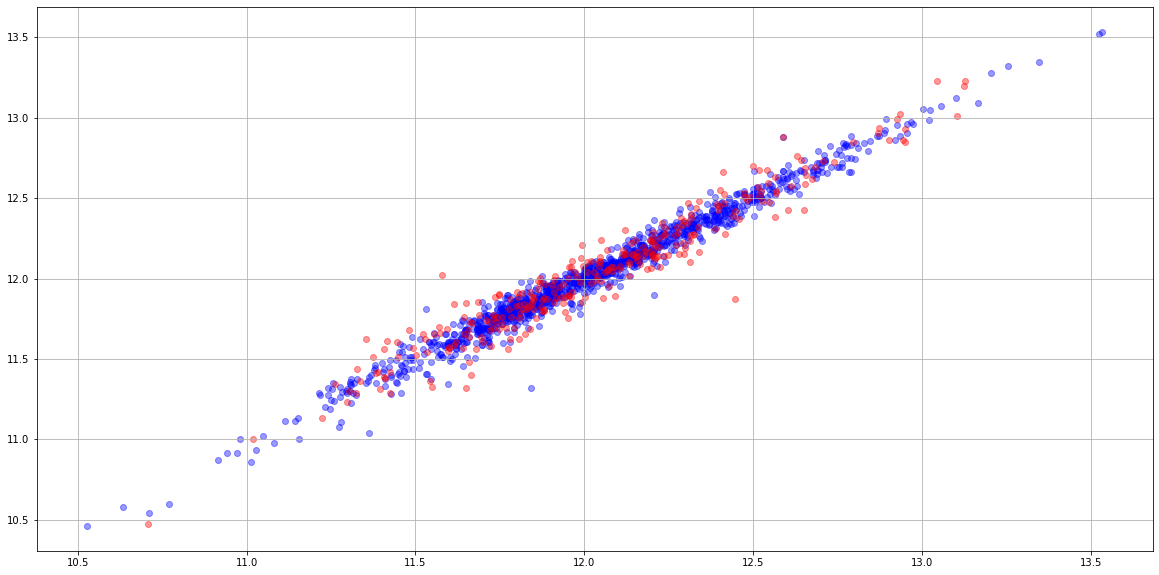

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_3.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_3.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [17]:
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
#                           predictor='gpu_predictor', random_state=state, eval_metric='rmse')

nestimators = np.linspace(465, 495, 11).astype(int)
maxdepth = [2]
eta_ = [0.14]

gparam_xgb_4 = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

gs_xgb_4 = ms.GridSearchCV(xg_reg, gparam_xgb_4, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_4.fit(xtrain, ytrain)

l_scores.append(gs_xgb_4.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb_4, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_4, ytest, xtest))
best_par_list.append(gs_xgb_4.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 1min 11s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.976602,0.060629,0.106766,-0.046138,0.14,2,465


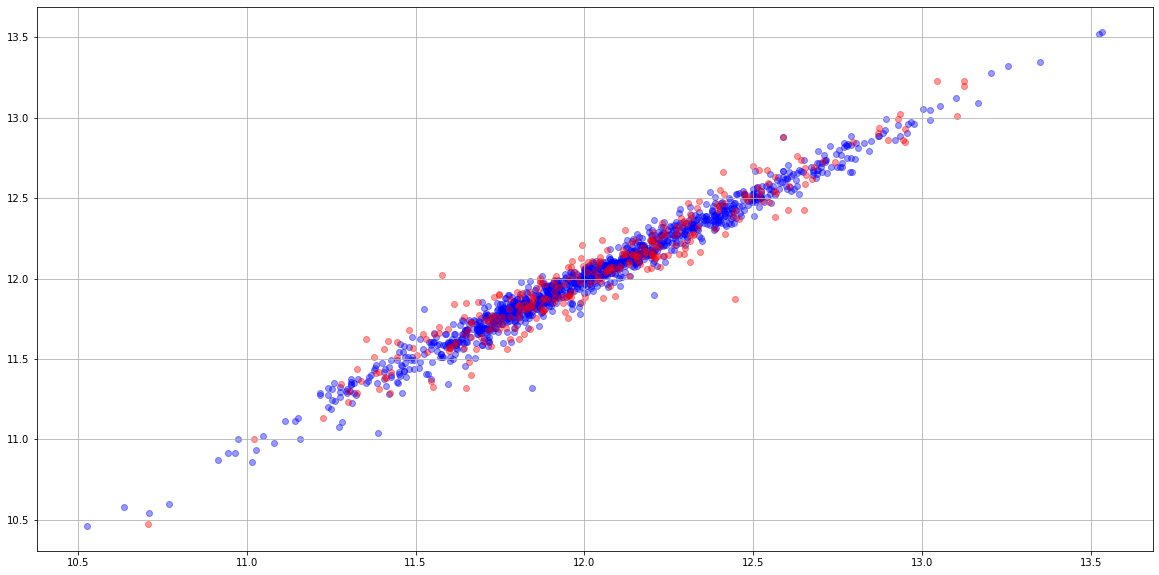

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_4.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_4.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [19]:
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []


# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
#                           predictor='gpu_predictor', random_state=state, eval_metric='rmse')

nestimators = np.linspace(460, 475, 16).astype(int)
maxdepth = [2]
eta_ = [0.14]

gparam_xgb_5 = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

gs_xgb_5 = ms.GridSearchCV(xg_reg, gparam_xgb_5, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_5.fit(xtrain, ytrain)

l_scores.append(gs_xgb_5.best_estimator_.score(xtrain, ytrain))
train_rmse.append(rmse(gs_xgb_5, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_5, ytest, xtest))
best_par_list.append(gs_xgb_5.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 1min 40s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.976862,0.06029,0.106905,-0.046615,0.14,2,470


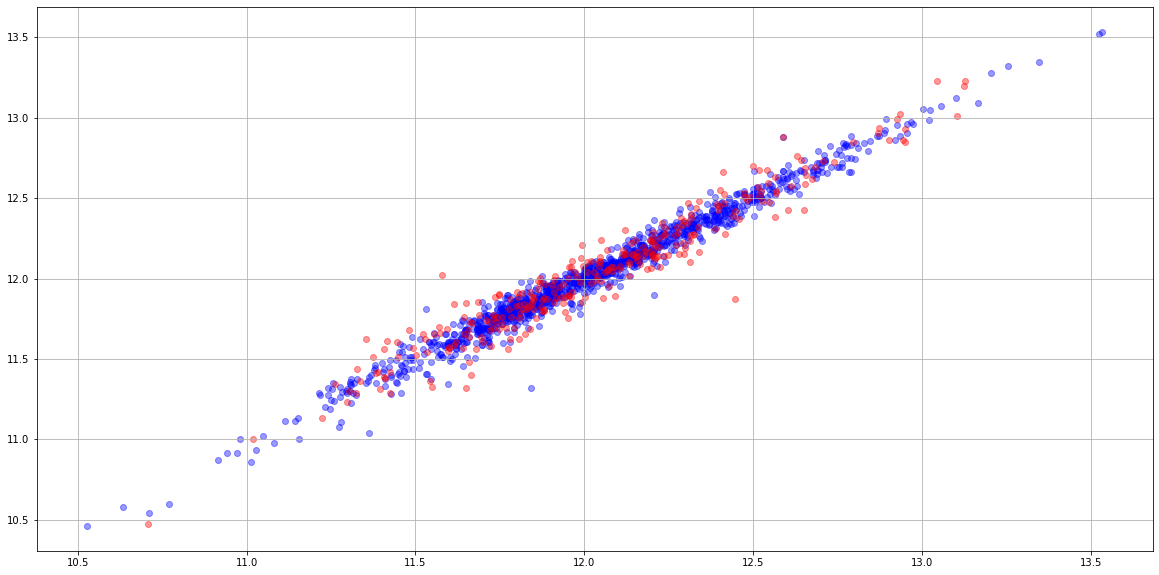

In [20]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_5.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_5.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- from here, will only display code that seemed to produce the best parameters (lower absolute difference in RMSE and higher score)

## Using Imputed Dataset for XGB

# XGBoost with hp_full_strd

In [22]:
# train test split using the dataframe from above
state = 0

xtrain_full, xtest_full, ytrain_full, ytest_full = ms.train_test_split(hp_full_strd,
                                                                       hp_logsaleprice,
                                                                       test_size=0.2,
                                                                       random_state=state)

ytrain_full = ytrain_full.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse')

In [26]:
# using lists to store values for dataframe
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [225, 250, 281, 300, 325]
maxdepth = [2, 3, 4]
eta_ = np.linspace(0.125, 0.21, 6)

gparam_xgb_full = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

# applying gridsearch using the n_folds value from above
gs_xgb_full = ms.GridSearchCV(xg_reg, gparam_xgb_full, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_full.fit(xtrain_full, ytrain_full)

# appending values to lists to apply to dataframe
l_scores.append(gs_xgb_full.best_estimator_.score(xtrain_full, ytrain_full))
train_rmse.append(rmse(gs_xgb_full, ytrain_full, xtrain_full))
test_rmse.append(rmse(gs_xgb_full, ytest_full, xtest_full))
best_par_list.append(gs_xgb_full.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]

# creating dataframe
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 7min 6s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.966512,0.072532,0.105992,-0.03346,0.125,2,325


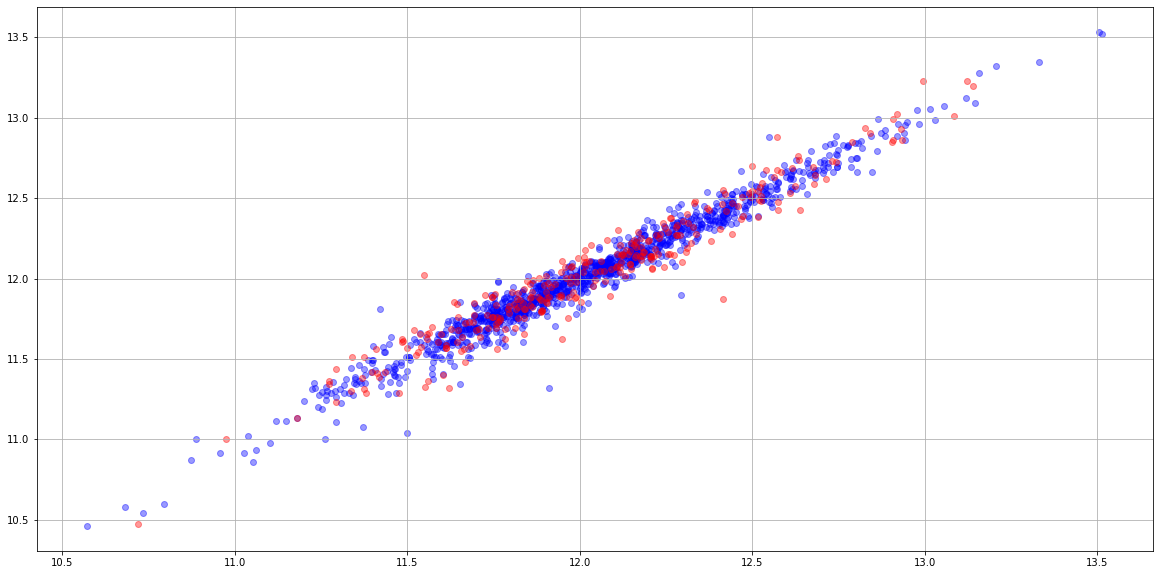

In [27]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_full.best_estimator_.predict(xtrain_full), ytrain_full, color='blue', alpha=0.4)
plt.scatter(gs_xgb_full.best_estimator_.predict(xtest_full), ytest_full, color='red', alpha=0.4)
plt.grid(which='both')

In [31]:
# Storing parameters 
xg_reg_hp_full_strd = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                                       predictor='gpu_predictor', random_state=state,
                                       eval_metric='rmse', n_estimators=325, max_depth=2,
                                       learning_rate=0.125)

%store xg_reg_hp_full_strd

Stored 'xg_reg_hp_full_strd' (XGBRegressor)


# XGBoost with hp_lasso_strd_reduced

In [45]:
# train test split using the dataframe from above
state = 0

xtrain_lasso, xtest_lasso, ytrain_lasso, ytest_lasso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                       hp_logsaleprice,
                                                                       test_size=0.2,
                                                                       random_state=state)

ytrain = ytrain_lasso.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse')

In [54]:
# using lists to store values for dataframe
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [300, 400, 500, 600, 700]
maxdepth = [2, 3, 4]
eta_ = np.linspace(0.1, 0.175, 6)

gparam_xgb_lasso = {'n_estimators': nestimators,
                    'max_depth': maxdepth,
                    'learning_rate': eta_}

# applying gridsearch using the n_folds value from above
gs_xgb_lasso = ms.GridSearchCV(xg_reg, gparam_xgb_lasso, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_lasso.fit(xtrain_lasso, ytrain_lasso)

# appending values to lists to apply to dataframe
l_scores.append(gs_xgb_lasso.best_estimator_.score(xtrain_lasso, ytrain_lasso))
train_rmse.append(rmse(gs_xgb_lasso, ytrain_lasso, xtrain_lasso))
test_rmse.append(rmse(gs_xgb_lasso, ytest_lasso, xtest_lasso))
best_par_list.append(gs_xgb_lasso.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]

# creating dataframe
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 12min 48s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.96834,0.070524,0.107153,-0.036629,0.16,2,300


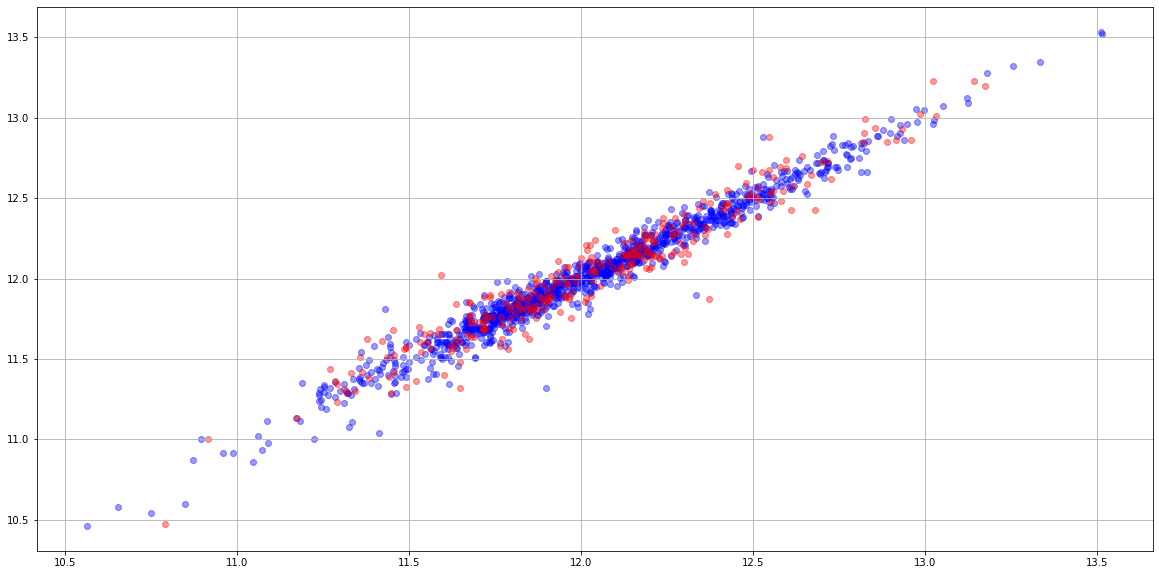

In [55]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_lasso.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_lasso.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [62]:
xg_reg_lasso_reduced = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=0, eval_metric='rmse',
                          n_estimators=300, max_depth=2, learning_rate=0.16)
%store xg_reg_lasso_reduced

Stored 'xg_reg_lasso_reduced' (XGBRegressor)


# XGBoost with hp_full_myversion

In [32]:
# train test split using the dataframe from above
state = 0

xtrain_full_myver, xtest_full_myver, ytrain_full_myver, ytest_full_myver = ms.train_test_split(hp_full_myversion,
                                                                       hp_logsaleprice,
                                                                       test_size=0.2,
                                                                       random_state=state)

ytrain_full_myver = ytrain_full_myver.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse')

In [37]:
# using lists to store values for dataframe
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [350, 375, 400, 425, 450, 500]
maxdepth = [2, 3]
eta_ = np.linspace(0.1, 0.175, 6)

gparam_xgb_myver = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

# applying gridsearch using the n_folds value from above
gs_xgb_myver = ms.GridSearchCV(xg_reg, gparam_xgb_myver, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_myver.fit(xtrain_full_myver, ytrain_full_myver)

# appending values to lists to apply to dataframe
l_scores.append(gs_xgb_myver.best_estimator_.score(xtrain_full_myver, ytrain_full_myver))
train_rmse.append(rmse(gs_xgb_myver, ytrain_full_myver, xtrain_full_myver))
test_rmse.append(rmse(gs_xgb_myver, ytest_full_myver, xtest_full_myver))
best_par_list.append(gs_xgb_myver.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]

# creating dataframe
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 7min 31s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.961518,0.077753,0.10717,-0.029417,0.1,2,350


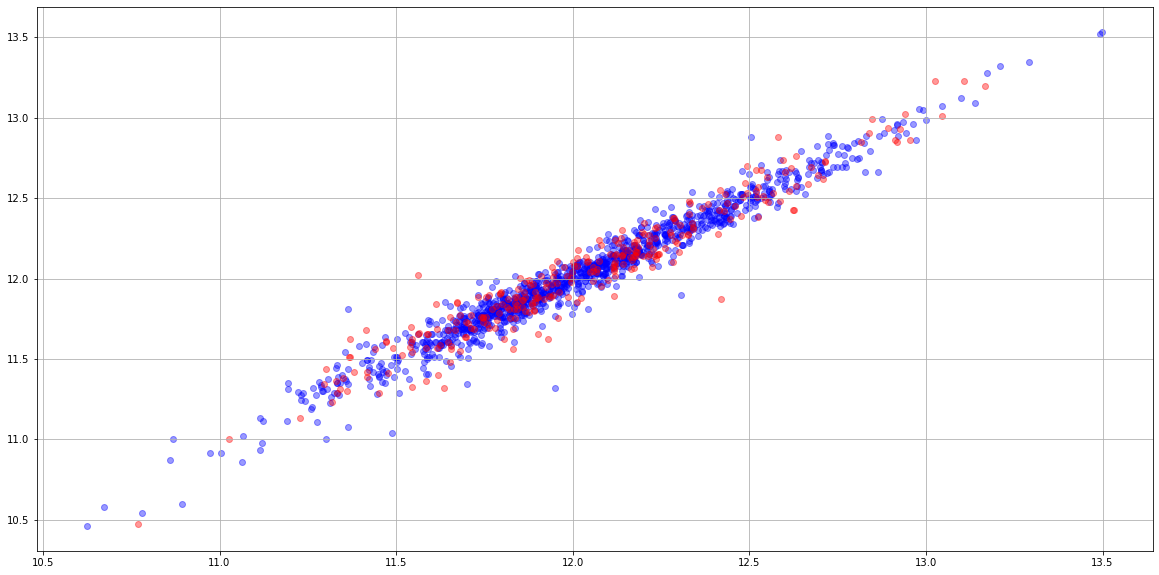

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_myver.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_myver.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [41]:
xg_reg_hp_full_myver = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                                       predictor='gpu_predictor', random_state=state,
                                       eval_metric='rmse', n_estimators=350, max_depth=2,
                                       learning_rate=0.1)

%store xg_reg_hp_full_myver

Stored 'xg_reg_hp_full_myver' (XGBRegressor)


# XGBoost with hp_lasso_myversion_reduced

In [3]:
# train test split using the dataframe from above
state = 0

xtrain_lso_myver, xtest_lso_myver, ytrain_lso_myver, ytest_lso_myver = ms.train_test_split(hp_lasso_myversion_reduced,
                                                                                           hp_logsaleprice,
                                                                                           test_size=0.2,
                                                                                           random_state=state)

ytrain_lso_myver = ytrain_lso_myver.values.flatten()
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse')

In [12]:
# using lists to store values for dataframe
l_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting parameters
nestimators = [771, 772, 773, 774, 775, 776, 777, 778, 779]
maxdepth = [2]
eta_ = np.linspace(0.088, 0.1, 16)

gparam_xgb_lso_myver = {'n_estimators': nestimators,
              'max_depth': maxdepth,
              'learning_rate': eta_}

# applying gridsearch using the n_folds value from above
gs_xgb_lso_myver = ms.GridSearchCV(xg_reg, gparam_xgb_lso_myver, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_lso_myver.fit(xtrain_lso_myver, ytrain_lso_myver)

# appending values to lists to apply to dataframe
l_scores.append(gs_xgb_lso_myver.best_estimator_.score(xtrain_lso_myver, ytrain_lso_myver))
train_rmse.append(rmse(gs_xgb_lso_myver, ytrain_lso_myver, xtrain_lso_myver))
test_rmse.append(rmse(gs_xgb_lso_myver, ytest_lso_myver, xtest_lso_myver))
best_par_list.append(gs_xgb_lso_myver.best_params_)
diff_rmse = np.subtract(train_rmse, test_rmse)
xgb_list_results = [l_scores, train_rmse, test_rmse, diff_rmse]

# creating dataframe
xgb_res_df = pd.DataFrame(xgb_list_results).T
xgb_res_df.columns = ['Scores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_res_df = pd.concat([xgb_res_df, best_par_df], axis=1, sort=False)
xgb_res_df

Wall time: 27min 8s


,Scores,TrainRMSE,TestRMSE,DiffRMSE,learning_rate,max_depth,n_estimators
0,0.965723,0.073382,0.114559,-0.041177,0.0888,2,775


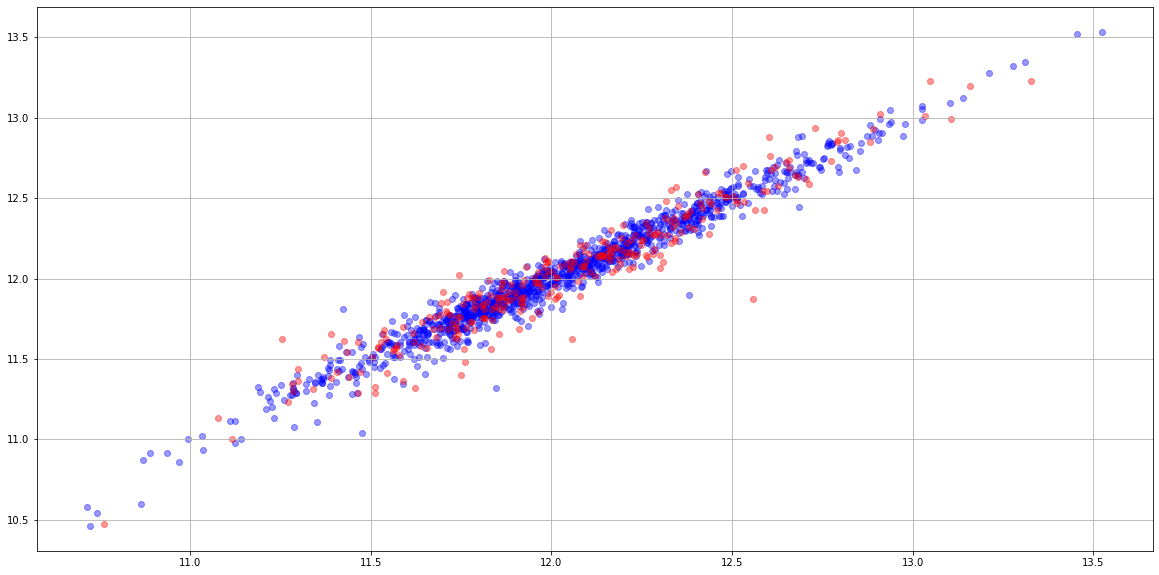

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_lso_myver.best_estimator_.predict(xtrain_lso_myver), ytrain_lso_myver, color='blue', alpha=0.4)
plt.scatter(gs_xgb_lso_myver.best_estimator_.predict(xtest_lso_myver), ytest_lso_myver, color='red', alpha=0.4)
plt.grid(which='both')

In [16]:
xg_reg_lso_myver = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist',
                          predictor='gpu_predictor', random_state=state, eval_metric='rmse',
                          n_estimators=775, max_depth=2, learning_rate=0.0888)
%store xg_reg_lso_myver

Stored 'xg_reg_lso_myver' (XGBRegressor)


In [ ]:
- will use xg_reg_hp_xgb_final since we were able to use  and xg_reg_lasso_reduced

In [ ]:
xg_reg_hp_full_strd

In [ ]:
xg_reg_hp_full_myver

In [ ]:
xg_reg_lasso_reduced

In [ ]:
xg_reg_lso_myver